In [1]:
# Importing libs
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("winequality-white.csv", sep=";")

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [3]:
x = df[df.columns[:-1]].values
y = df["quality"].values

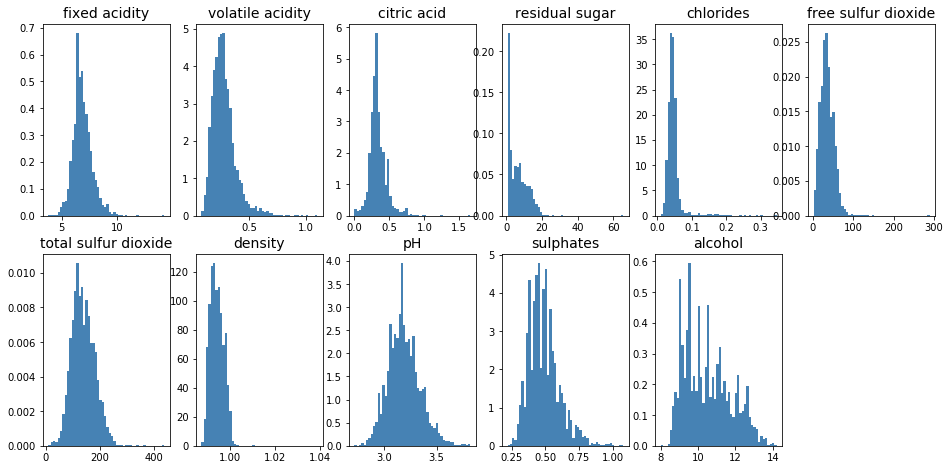

In [4]:
fig = plt.figure(figsize=(16,12))

for feature_i in range(x.shape[1]):
    x_axis = fig.add_subplot(3,6, (feature_i+1))
    h_axis = x_axis.hist(x[:, feature_i], bins=50, color="steelblue", density=True, edgecolor="none")
    x_axis.set_title(df.columns[feature_i], fontsize=14)
    

In [5]:
y_class = np.where(y<6,0,1)

In [6]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y_class,test_size=0.3)

In [7]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)


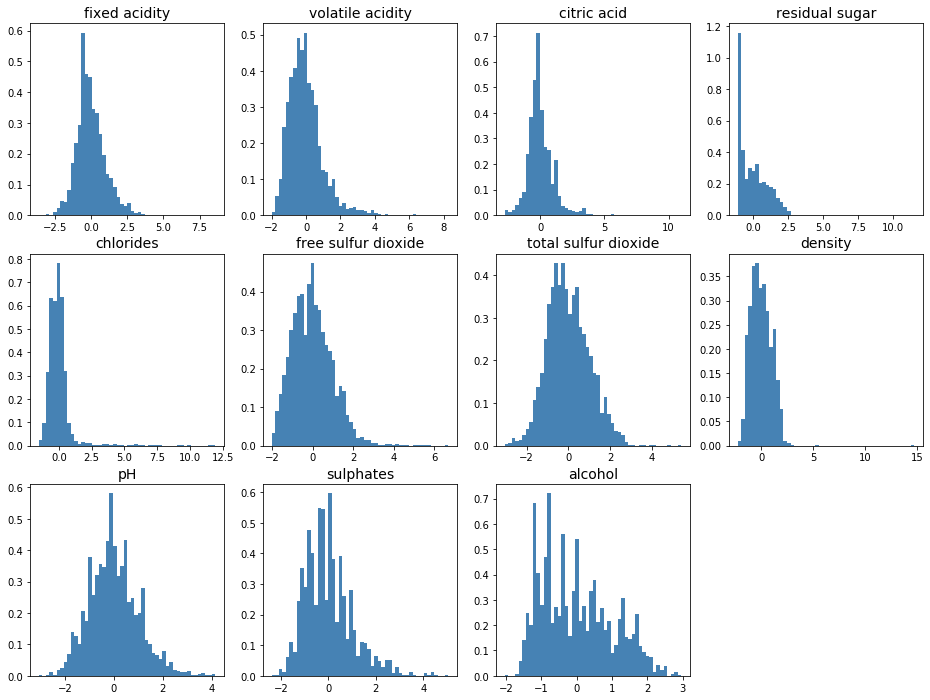

In [8]:
fig = plt.figure(figsize=(16, 12))

for feat_idx in range(x_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(x_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(df.columns[feat_idx], fontsize=14)


In [9]:
from sklearn import neighbors, metrics

# hyperparameters to set
param_grid = {"n_neighbors": [3,5,7,9,11,13,15]}

score = 'accuracy'

clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),
    param_grid, # hyperparameters to test
    cv=5, # folds for cross validation (5 or 10 generally)
    scoring=score # score to optimize
)

# optimize the classifier on the training set
clf.fit(x_train_std, y_train)

print("Best Hyperparameters on training test")
print(clf.best_params_)

print("Cross validation results")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], 
        clf.cv_results_['std_test_score'],  
        clf.cv_results_['params']           
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )



Best Hyperparameters on training test
{'n_neighbors': 5}
Cross validation results
accuracy = 0.753 (+/-0.014) for {'n_neighbors': 3}
accuracy = 0.758 (+/-0.022) for {'n_neighbors': 5}
accuracy = 0.757 (+/-0.020) for {'n_neighbors': 7}
accuracy = 0.756 (+/-0.023) for {'n_neighbors': 9}
accuracy = 0.754 (+/-0.025) for {'n_neighbors': 11}
accuracy = 0.757 (+/-0.017) for {'n_neighbors': 13}
accuracy = 0.755 (+/-0.022) for {'n_neighbors': 15}


In [10]:
y_pred = clf.predict(x_test_std)

print("On test dataset, accurency: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

On test dataset, accurency: 0.752
